# Начало лабораторной работы №7 #

In [119]:
import pandas as pd
df = pd.read_csv("..//static//csv//ndtv_data_final.csv")
print(df.columns)
display(df.head())

Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')


Unnamed: 0                            Name    Brand  \
0           0  OnePlus 7T Pro McLaren Edition  OnePlus   
1           1                   Realme X2 Pro   Realme   
2           2               iPhone 11 Pro Max    Apple   
3           3                       iPhone 11    Apple   
4           4                    LG G8X ThinQ       LG   

                    Model  Battery capacity (mAh)  Screen size (inches)  \
0  7T Pro McLaren Edition                    4085                  6.67   
1                  X2 Pro                    4000                  6.50   
2       iPhone 11 Pro Max                    3969                  6.50   
3               iPhone 11                    3110                  6.10   
4               G8X ThinQ                    4000                  6.40   

  Touchscreen  Resolution x  Resolution y  Processor  ...  Rear camera  \
0         Yes          1440          3120          8  ...         48.0   
1         Yes          1080          2400          8  ...         64.0   
2         Yes          1242          2688          6  ...         12.0   
3         Yes           828          1792          6  ...         12.0   
4         Yes          1080          2340          8  ...         12.0   

   Front camera  Operating system  Wi-Fi Bluetooth  GPS Number of SIMs   3G  \
0          16.0           Android    Yes       Yes  Yes              2  Yes   
1          16.0           Android    Yes       Yes  Yes              2  Yes   
2          12.0               iOS    Yes       Yes  Yes              2  Yes   
3          12.0               iOS    Yes       Yes  Yes              2  Yes   
4          32.0           Android    Yes       Yes  Yes              1   No   

   4G/ LTE   Price  
0      Yes   58998  
1      Yes   27999  
2      Yes  106900  
3      Yes   62900  
4       No   49990  

[5 rows x 22 columns]


**Создание лингвистических переменных**

Входные переменные: Battery capacity (mAh) (емкость батареи) и RAM (MB) (объем оперативной памяти). \
Выходная переменная: Price (цена).

In [120]:
import numpy as np
from skfuzzy import control as ctrl

data = pd.read_csv("..//static//csv//ndtv_data_final.csv")

# Инициализация лингвистических переменных
battery_capacity = ctrl.Antecedent(np.arange(data['Battery capacity (mAh)'].min(), data['Battery capacity (mAh)'].max(), 100), "battery_capacity")
ram = ctrl.Antecedent(np.arange(data['RAM (MB)'].min(), data['RAM (MB)'].max(), 100), "ram")
price = ctrl.Consequent(np.arange(data['Price'].min(), data['Price'].max(), 10), "price")

**Формирование нечетких переменных для лингвистических переменных и их визуализация**

d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


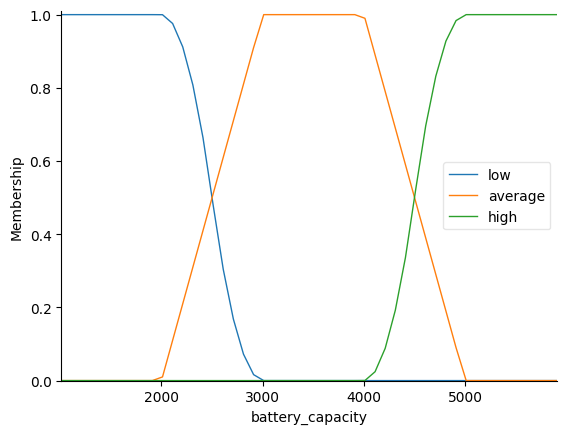

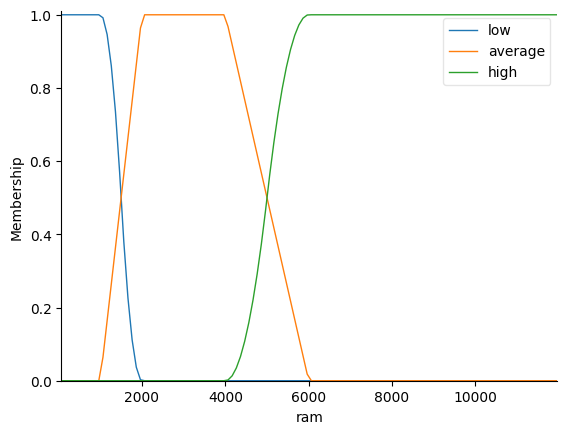

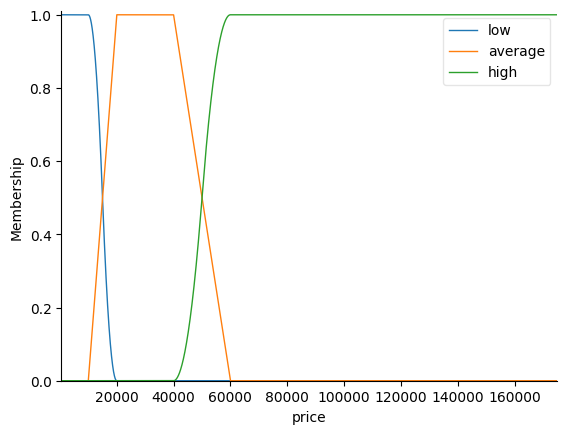

In [121]:
import skfuzzy as fuzz

battery_capacity['low'] = fuzz.zmf(battery_capacity.universe, 2000, 3000)
battery_capacity['average'] = fuzz.trapmf(battery_capacity.universe, [2000, 3000, 4000, 5000])
battery_capacity['high'] = fuzz.smf(battery_capacity.universe, 4000, 5000)

ram['low'] = fuzz.zmf(ram.universe, 1000, 2000)
ram['average'] = fuzz.trapmf(ram.universe, [1000, 2000, 4000, 6000])
ram['high'] = fuzz.smf(ram.universe, 4000, 6000)

price['low'] = fuzz.zmf(price.universe, 10000, 20000)
price['average'] = fuzz.trapmf(price.universe, [10000, 20000, 40000, 60000])
price['high'] = fuzz.smf(price.universe, 40000, 60000)

battery_capacity.view()
ram.view()
price.view()

**Формирование и визуализация базы нечетких правил**

(<Figure size 640x480 with 1 Axes>, <Axes: >)

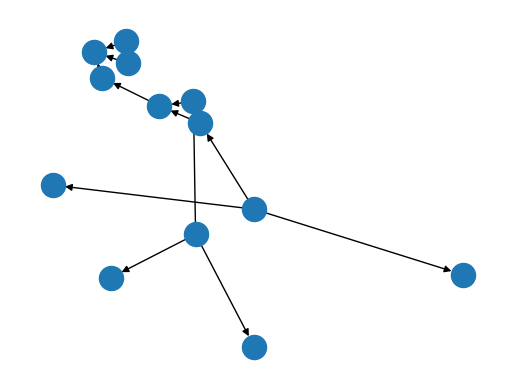

In [122]:
# Нечеткие правила
rule1 = ctrl.Rule(battery_capacity["low"] & ram["low"], price["low"])
rule2 = ctrl.Rule(battery_capacity["low"] & ram["average"], price["low"])
rule3 = ctrl.Rule(battery_capacity["low"] & ram["high"], price["average"])
rule4 = ctrl.Rule(battery_capacity["average"] & ram["low"], price["low"])
rule5 = ctrl.Rule(battery_capacity["average"] & ram["average"], price["average"])
rule6 = ctrl.Rule(battery_capacity["average"] & ram["high"], price["high"])
rule7 = ctrl.Rule(battery_capacity["high"] & ram["low"], price["average"])
rule8 = ctrl.Rule(battery_capacity["high"] & ram["average"], price["high"])
rule9 = ctrl.Rule(battery_capacity["high"] & ram["high"], price["high"])
rule1.view()

**Создание нечеткой системы и добавление нечетких правил в базу знаний нечеткой системы**

In [123]:
price_ctrl = ctrl.ControlSystem(
    [
        rule1,
        rule2,
        rule3,
        rule4,
        rule5,
        rule6,
        rule7,
        rule8,
        rule9,
    ]
)

# Создание симулятора нечеткой системы
price_sim = ctrl.ControlSystemSimulation(price_ctrl)

**Пример расчета выходной переменной influx на основе входных переменных level и flow** \
Система также формирует подробный журнал выполнения процесса нечеткого логического вывода

In [124]:
price_sim.input['battery_capacity'] = 4000
price_sim.input['ram'] = 2000
price_sim.compute()

price_sim.print_state()

price_sim.output["price"]

 Antecedents 
Antecedent: battery_capacity        = 4000
  - low                             : 0.0
  - average                         : 0.991
  - high                            : 0.00017999999999999998
Antecedent: ram                     = 2000
  - low                             : 0.0016588799999999997
  - average                         : 0.9769599999999999
  - high                            : 0.0

 Rules 
RULE #0:
  IF battery_capacity[low] AND ram[low] THEN price[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - battery_capacity[low]                                  : 0.0
  - ram[low]                                               : 0.0016588799999999997
                        battery_capacity[low] AND ram[low] = 0.0
  Activation (THEN-clause):
                                                price[low] : 0.0

RULE #1:
  IF battery_capacity[low] AND ram[average] THEN price[low]
	AND aggregation function : fmin
	OR aggregation f

np.float64(32933.17210826396)

**Визуализация функции принадлежности для выходной переменной influx** /
Функция получена в процессе аккумуляции и используется для дефаззификации значения выходной переменной influx

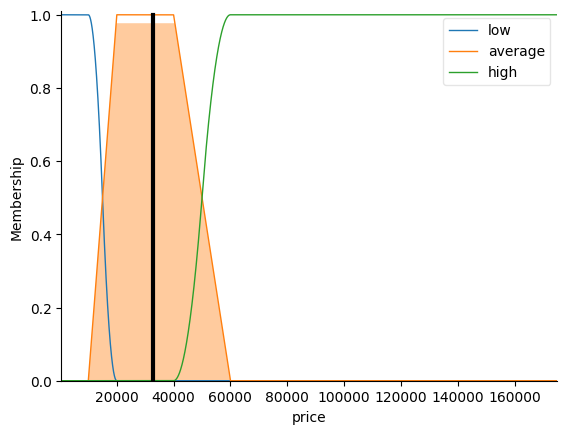

In [125]:
price.view(sim=price_sim)


### Пример решения задачи регрессии на основе нечеткого логического вывода ###

**Загрузка данных**

In [126]:
import pandas as pd

data_train = pd.read_csv("..//static//csv//ndtv_data_final.csv", sep=",")
data_test = pd.read_csv("..//static//csv//ndtv_data_final.csv", sep=",")

display(data_train.head(3))
display(data_test.head(3))

Unnamed: 0                            Name    Brand  \
0           0  OnePlus 7T Pro McLaren Edition  OnePlus   
1           1                   Realme X2 Pro   Realme   
2           2               iPhone 11 Pro Max    Apple   

                    Model  Battery capacity (mAh)  Screen size (inches)  \
0  7T Pro McLaren Edition                    4085                  6.67   
1                  X2 Pro                    4000                  6.50   
2       iPhone 11 Pro Max                    3969                  6.50   

  Touchscreen  Resolution x  Resolution y  Processor  ...  Rear camera  \
0         Yes          1440          3120          8  ...         48.0   
1         Yes          1080          2400          8  ...         64.0   
2         Yes          1242          2688          6  ...         12.0   

   Front camera  Operating system  Wi-Fi Bluetooth  GPS Number of SIMs   3G  \
0          16.0           Android    Yes       Yes  Yes              2  Yes   
1          16.0           Android    Yes       Yes  Yes              2  Yes   
2          12.0               iOS    Yes       Yes  Yes              2  Yes   

   4G/ LTE   Price  
0      Yes   58998  
1      Yes   27999  
2      Yes  106900  

[3 rows x 22 columns]

Unnamed: 0                            Name    Brand  \
0           0  OnePlus 7T Pro McLaren Edition  OnePlus   
1           1                   Realme X2 Pro   Realme   
2           2               iPhone 11 Pro Max    Apple   

                    Model  Battery capacity (mAh)  Screen size (inches)  \
0  7T Pro McLaren Edition                    4085                  6.67   
1                  X2 Pro                    4000                  6.50   
2       iPhone 11 Pro Max                    3969                  6.50   

  Touchscreen  Resolution x  Resolution y  Processor  ...  Rear camera  \
0         Yes          1440          3120          8  ...         48.0   
1         Yes          1080          2400          8  ...         64.0   
2         Yes          1242          2688          6  ...         12.0   

   Front camera  Operating system  Wi-Fi Bluetooth  GPS Number of SIMs   3G  \
0          16.0           Android    Yes       Yes  Yes              2  Yes   
1          16.0           Android    Yes       Yes  Yes              2  Yes   
2          12.0               iOS    Yes       Yes  Yes              2  Yes   

   4G/ LTE   Price  
0      Yes   58998  
1      Yes   27999  
2      Yes  106900  

[3 rows x 22 columns]

**Инициализация лингвистических переменных и автоматическое формирование нечетких переменных**

d:\ULSTU\AIM2\AIM-PIbd-32-Puchkina-A-A\aimenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


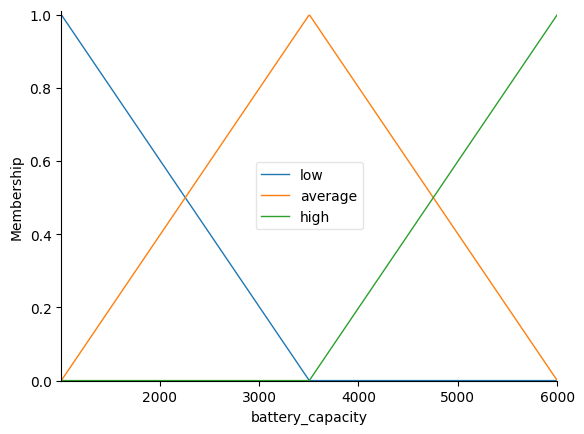

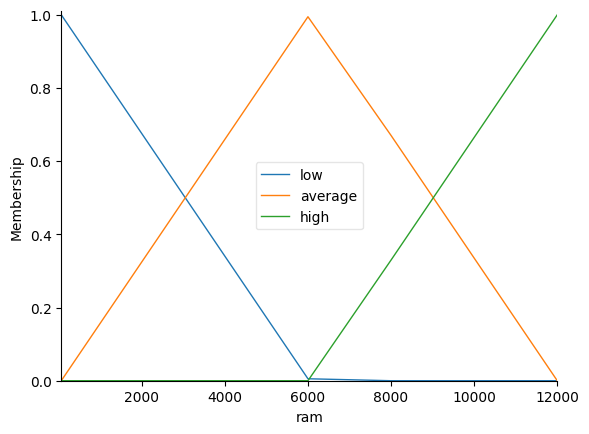

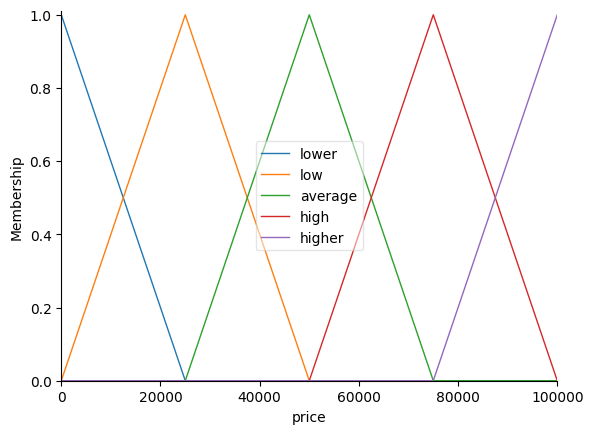

In [127]:
data = pd.read_csv("..//static//csv//ndtv_data_final.csv")

# Инициализация нечетких переменных
battery_capacity = ctrl.Antecedent(data["Battery capacity (mAh)"].sort_values().unique(), "battery_capacity")
ram = ctrl.Antecedent(data["RAM (MB)"].sort_values().unique(), "ram")
price = ctrl.Consequent(np.arange(0, 100001, 1000), "price")

battery_capacity.automf(3, variable_type="quant")
battery_capacity.view()
ram.automf(3, variable_type="quant")
ram.view()
price.automf(5, variable_type="quant")
price.view()

**Нечеткие правила**

In [128]:
rule1 = ctrl.Rule(
    battery_capacity["low"] & ram["low"],
    price["low"],
)
rule2 = ctrl.Rule(
    battery_capacity["average"] & ram["low"],
    price["low"],
)
rule3 = ctrl.Rule(
    battery_capacity["high"] & ram["low"],
    price["average"],
)

rule4 = ctrl.Rule(
    battery_capacity["low"] & ram["average"],
    price["low"],
)
rule5 = ctrl.Rule(
    battery_capacity["average"] & ram["average"],
    price["average"],
)
rule6 = ctrl.Rule(
    battery_capacity["high"] & ram["average"],
    price["high"],
)

rule7 = ctrl.Rule(
    battery_capacity["low"] & ram["high"],
    price["average"],
)
rule8 = ctrl.Rule(
    battery_capacity["average"] & ram["high"],
    price["high"],
)
rule9 = ctrl.Rule(
    battery_capacity["high"] & ram["high"],
    price["high"],
)

**Создание нечеткой системы**

In [129]:
fuzzy_rules = [
    rule1,
    rule2,
    rule3,
    rule4,
    rule5,
    rule6,
    rule7,
    rule8,
    rule9,
]

price_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(price_cntrl)

fuzzy_rules

[IF battery_capacity[low] AND ram[low] THEN price[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF battery_capacity[average] AND ram[low] THEN price[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF battery_capacity[high] AND ram[low] THEN price[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF battery_capacity[low] AND ram[average] THEN price[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF battery_capacity[average] AND ram[average] THEN price[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF battery_capacity[high] AND ram[average] THEN price[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF battery_capacity[low] AND ram[high] THEN price[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF battery_capacity[average] AND ram[high] THEN price[high]
 	AND aggregation function : fmin
 

**Пример использования полученной нечеткой системы**

In [130]:
example_row = data.iloc[3]  # Используем строку в качестве примера

sim.input["battery_capacity"] = example_row["Battery capacity (mAh)"]
sim.input["ram"] = example_row["RAM (MB)"]

sim.compute()

sim.print_state()
display(sim.output["price"])

 Antecedents 
Antecedent: battery_capacity        = 3110
  - low                             : 0.15831663326653306
  - average                         : 0.8416833667334669
  - high                            : 0.0
Antecedent: ram                     = 4000
  - low                             : 0.34048257372654156
  - average                         : 0.6595174262734584
  - high                            : 0.0

 Rules 
RULE #0:
  IF battery_capacity[low] AND ram[low] THEN price[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - battery_capacity[low]                                  : 0.15831663326653306
  - ram[low]                                               : 0.34048257372654156
                        battery_capacity[low] AND ram[low] = 0.15831663326653306
  Activation (THEN-clause):
                                                price[low] : 0.15831663326653306

RULE #1:
  IF battery_capacity[average] AND ram[low] THEN price[l

np.float64(40755.45920618248)

**Функция для автоматизации вычисления целевой переменной Y на основе вектора признаков X**

In [131]:
print(data_train.columns)

Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')


In [132]:
def fuzzy_pred(row):
    sim.input["battery_capacity"] = row["Battery capacity (mAh)"]
    sim.input["ram"] = row["RAM (MB)"]
    sim.compute()
    return sim.output["price"]

**Тестирование нечеткой системы на обучающей выборке**

In [133]:
result_train = data_train.copy()
result_train["Predicted Price"] = result_train.apply(fuzzy_pred, axis=1)

result_train.head(15)

Unnamed: 0                            Name    Brand  \
0            0  OnePlus 7T Pro McLaren Edition  OnePlus   
1            1                   Realme X2 Pro   Realme   
2            2               iPhone 11 Pro Max    Apple   
3            3                       iPhone 11    Apple   
4            4                    LG G8X ThinQ       LG   
5            5                      OnePlus 7T  OnePlus   
6            6                  OnePlus 7T Pro  OnePlus   
7            7         Samsung Galaxy Note 10+  Samsung   
8            8                Asus ROG Phone 2     Asus   
9            9            Xiaomi Redmi K20 Pro   Xiaomi   
10          10                         Oppo K3     Oppo   
11          11                        Realme X   Realme   
12          12                Xiaomi Redmi K20   Xiaomi   
13          13                   OnePlus 7 Pro  OnePlus   
14          14              Oppo Reno 10x Zoom     Oppo   

                     Model  Battery capacity (mAh)  Screen size (inches)  \
0   7T Pro McLaren Edition                    4085                  6.67   
1                   X2 Pro                    4000                  6.50   
2        iPhone 11 Pro Max                    3969                  6.50   
3                iPhone 11                    3110                  6.10   
4                G8X ThinQ                    4000                  6.40   
5                       7T                    3800                  6.55   
6                   7T Pro                    4085                  6.67   
7          Galaxy Note 10+                    4300                  6.80   
8              ROG Phone 2                    6000                  6.59   
9            Redmi K20 Pro                    4000                  6.39   
10                      K3                    3765                  6.50   
11                       X                    3765                  6.53   
12               Redmi K20                    4000                  6.39   
13                   7 Pro                    4000                  6.67   
14           Reno 10x Zoom                    4065                  6.60   

   Touchscreen  Resolution x  Resolution y  Processor  ...  Front camera  \
0          Yes          1440          3120          8  ...          16.0   
1          Yes          1080          2400          8  ...          16.0   
2          Yes          1242          2688          6  ...          12.0   
3          Yes           828          1792          6  ...          12.0   
4          Yes          1080          2340          8  ...          32.0   
5          Yes          1080          2400          8  ...          16.0   
6          Yes          1440          3120          8  ...          16.0   
7          Yes          1440          3040          8  ...          10.0   
8          Yes          1080          2340          8  ...          24.0   
9          Yes          1080          2340          8  ...          20.0   
10         Yes          1080          2340          8  ...          16.0   
11         Yes          1080          2340          8  ...          16.0   
12         Yes          1080          2340          8  ...          20.0   
13         Yes          1440          3120          8  ...          16.0   
14         Yes          1080          2340          8  ...          16.0   

    Operating system  Wi-Fi  Bluetooth  GPS Number of SIMs   3G 4G/ LTE  \
0            Android    Yes        Yes  Yes              2  Yes     Yes   
1            Android    Yes        Yes  Yes              2  Yes     Yes   
2                iOS    Yes        Yes  Yes              2  Yes     Yes   
3                iOS    Yes        Yes  Yes              2  Yes     Yes   
4            Android    Yes        Yes  Yes              1   No      No   
5            Android    Yes        Yes   No              2  Yes     Yes   
6            Android    Yes        Yes  Yes              2  Yes     Yes   
7            Android    Y


**Тестирование нечеткой системы на тестовой выборке**

In [135]:
result_test = data_test.copy()

result_test["Predicted Price"] = result_test.apply(fuzzy_pred, axis=1)

result_test

Unnamed: 0                            Name     Brand  \
0              0  OnePlus 7T Pro McLaren Edition   OnePlus   
1              1                   Realme X2 Pro    Realme   
2              2               iPhone 11 Pro Max     Apple   
3              3                       iPhone 11     Apple   
4              4                    LG G8X ThinQ        LG   
...          ...                             ...       ...   
1354        1354                   Intex Aqua A2     Intex   
1355        1355     Videocon Infinium Z51 Nova+  Videocon   
1356        1356                   Intex Aqua Y4     Intex   
1357        1357                 iBall Andi4 B20     iBall   
1358        1358             iBall Andi Avonte 5     iBall   

                       Model  Battery capacity (mAh)  Screen size (inches)  \
0     7T Pro McLaren Edition                    4085                  6.67   
1                     X2 Pro                    4000                  6.50   
2          iPhone 11 Pro Max                    3969                  6.50   
3                  iPhone 11                    3110                  6.10   
4                  G8X ThinQ                    4000                  6.40   
...                      ...                     ...                   ...   
1354                 Aqua A2                    1500                  4.00   
1355      Infinium Z51 Nova+                    2000                  5.00   
1356                 Aqua Y4                    1700                  4.50   
1357               Andi4 B20                    1250                  4.00   
1358           Andi Avonte 5                    2150                  5.00   

     Touchscreen  Resolution x  Resolution y  Processor  ...  Front camera  \
0            Yes          1440          3120          8  ...          16.0   
1            Yes          1080          2400          8  ...          16.0   
2            Yes          1242          2688          6  ...          12.0   
3            Yes           828          1792          6  ...          12.0   
4            Yes          1080          2340          8  ...          32.0   
...          ...           ...           ...        ...  ...           ...   
1354         Yes           480           800          4  ...           0.3   
1355         Yes           480           854          4  ...           5.0   
1356         Yes           480           854          2  ...           2.0   
1357         Yes           480           800          1  ...           0.3   
1358         Yes           480           854          4  ...           0.0   

      Operating system  Wi-Fi  Bluetooth  GPS Number of SIMs   3G 4G/ LTE  \
0              Android    Yes        Yes  Yes              2  Yes     Yes   
1              Android    Yes        Yes  Yes              2  Yes     Yes   
2                  iOS    Yes        Yes  Yes              2  Yes     Yes   
3                  iOS    Yes        Yes  Yes              2  Yes     Yes   
4              Android    Yes        Yes  Yes              1   No      No   
...                ...    ...        ...  ...            ...  ...     ...   
1354           Android    Yes        Yes  Yes              2  Yes      No   
1355           Android    Yes        Yes  Yes              2  Yes      No   
1356           Android    Yes        Yes   No              2  Yes      No   
1357           Android    Yes        Yes  Yes              2  Yes      No   
1358           Android    Yes        Yes  Yes              2  Yes      No   

       Price Predicted Price  
0      58998    75000.000000  
1      27999    55792.501783  
2     106900    46614.283392  
3      62900    40755.459206  
4      49990    55792.501783  
...      ...             ...  
1354    2599    27649.663226  
1355    2940    30578.211284  
1356    2999    27750.249507  
1357    2498    26169.615853  
1358    3999    30880.178199  

[1359 rows x 23 columns]

**Оценка результатов на основе метрик для задачи регрессии**

In [138]:
import math
from sklearn import metrics

rmetrics = {}

rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Price"], result_train["Predicted Price"])
)

rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Price"], result_test["Predicted Price"])
)

rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Price"], result_test["Predicted Price"])
)

rmetrics["R2_test"] = metrics.r2_score(
    result_test["Price"], result_test["Predicted Price"]
)

rmetrics

{'RMSE_train': 28568.780129367737,
 'RMSE_test': 28568.780129367737,
 'RMAE_test': 165.28156612336826,
 'R2_test': -3.2533731852277636}